In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eye-diseases-classification/dataset/glaucoma/1255_right.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/1482_left.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_398_8823411.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_309_4110303.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_13_697490.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_205_310538.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/Glaucoma_040.png
/kaggle/input/eye-diseases-classification/dataset/glaucoma/1256_right.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_221_3079640.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_392_9636183.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_12_5295071.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_399_7128170.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_113_8738972.jpg
/kaggle/input/eye-disea

In [48]:
import tensorflow 
import keras 
import os
import matplotlib.pyplot as plt
from keras.applications import EfficientNetB0
from keras.models import Sequential,Model
from keras.layers import Dropout,Dense,Activation,MaxPooling2D,Conv2D,ZeroPadding2D,Flatten,GlobalAveragePooling2D,LeakyReLU,ReLU
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator


# Resizing image to (128,128)

In [56]:

import os
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array, array_to_img

# Path to the dataset directory
dataset_path = '/kaggle/input/eye-diseases-classification/dataset'

# Output path for resized images
output_path = '/kaggle/working/resized_dataset1'

# Target size for resizing
target_size = (128,128)

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Loop through each class in the dataset
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    # Create a subdirectory for resized images
    resized_class_path = os.path.join(output_path, class_name)
    os.makedirs(resized_class_path, exist_ok=True)

    # Loop through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        
        # Load the image using PIL
        img = load_img(image_path)
        
        # Resize the image
        resized_img = img.resize(target_size, Image.ANTIALIAS)
        
        # Save the resized image
        output_image_path = os.path.join(resized_class_path, image_name)
        resized_img.save(output_image_path)

print("Image resizing complete.")


/tmp/ipykernel_42/935858146.py:33: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize(target_size, Image.ANTIALIAS)


Image resizing complete.


In [4]:
cataract_path = '/kaggle/input/eye-diseases-classification/dataset/cataract'
diabetic_retinopathy_path = '/kaggle/input/eye-diseases-classification/dataset/diabetic_retinopathy'
glaucoma_path = '/kaggle/input/eye-diseases-classification/dataset/glaucoma'
normal_path = '/kaggle/input/eye-diseases-classification/dataset/normal'

# Function to count files in a directory
def count_files(directory_path):
    return len([name for name in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, name))])

# Count files in each class
cataract_count = count_files(cataract_path)
diabetic_retinopathy_count = count_files(diabetic_retinopathy_path)
glaucoma_count = count_files(glaucoma_path)
normal_count = count_files(normal_path)


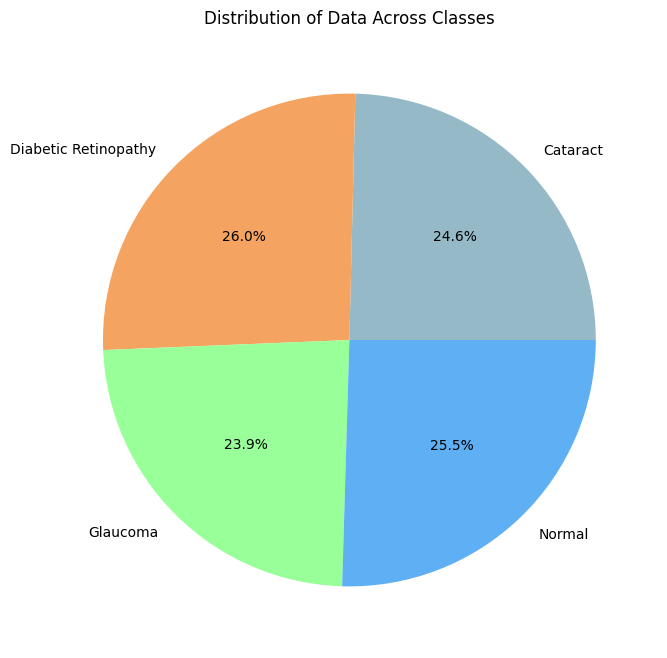

In [5]:
class_labels = ['Cataract', 'Diabetic Retinopathy', 'Glaucoma', 'Normal']
data_values = [cataract_count, diabetic_retinopathy_count, glaucoma_count, normal_count]
plt.figure(figsize=(8, 8))
plt.pie(data_values, labels=class_labels, autopct='%1.1f%%', colors=['#95B9C7', '#F4A460', '#99FF99', '#5FAFF5'])
plt.title('Distribution of Data Across Classes')

plt.show()

In [64]:
# splitting training and testing data
!pip install split-folders
import splitfolders

input_folder = '/kaggle/working/resized_dataset1'
output_folder = '/kaggle/working/split_data1'

# Specify the split ratio (70% for training, 30% for testing)
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.7, .3))


Copying files: 4217 files [00:00, 6141.66 files/s]


In [65]:
num_classes = 4
img_rows, img_cols =128,128
batch_size = 32

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/kaggle/working/split_data1/train'
validation_data_dir = '/kaggle/working/split_data1/val'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 2949 images belonging to 4 classes.
Found 1268 images belonging to 4 classes.


In [71]:
# model=Sequential()
# # model.add(Conv2D(512,(3,3),strides=(2,2),input_shape=(img_rows,img_cols,3)))
# # model.add(BatchNormalization())
# # model.add(ReLU())

# # # model.add(LeakyReLU(alpha=0.01))

# # model.add(Conv2D(512,(3,3),strides=(2,2)))
# # model.add(BatchNormalization())
# # # model.add(LeakyReLU(alpha=0.01))
# # model.add(ReLU())

# # model.add(MaxPooling2D(pool_size=(2, 2)))


# model.add(Conv2D(512,(3,3),padding='same',input_shape=(img_rows,img_cols,3)))
# model.add(ReLU())
# model.add(Conv2D(512,(3,3),padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # model.add(LeakyReLU(alpha=0.01))

# model.add(Conv2D(256,(3,3),padding='same'))
# model.add(ReLU())
# model.add(Conv2D(256,(3,3),padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))


# model.add(Conv2D(128,(3,3),padding='same'))
# model.add(ReLU())
# model.add(Conv2D(128,(3,3),padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(ReLU())
# model.add(Conv2D(32,(3,3),padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))






# model.add(Flatten())
# model.add(Dense(units=512,activation='relu'))
# model.add(Dropout(0.3))

# model.add(Dense(num_classes,activation='softmax'))

# print(model.summary())




model=Sequential()
# model.add(Conv2D(512,(3,3),strides=(2,2),input_shape=(img_rows,img_cols,3)))
# model.add(BatchNormalization())
# model.add(ReLU())

# # model.add(LeakyReLU(alpha=0.01))

# model.add(Conv2D(512,(3,3),strides=(2,2)))
# model.add(BatchNormalization())
# # model.add(LeakyReLU(alpha=0.01))
# model.add(ReLU())

# model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(16,(3,3),padding='same',input_shape=(img_rows,img_cols,3)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))





model.add(Flatten())
model.add(Dense(units=256,activation='relu'))


model.add(Dense(num_classes,activation='softmax'))

print(model.summary())








Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_112 (Conv2D)         (None, 128, 128, 16)      448       
                                                                 
 batch_normalization_83 (Ba  (None, 128, 128, 16)      64        
 tchNormalization)                                               
                                                                 
 re_lu_41 (ReLU)             (None, 128, 128, 16)      0         
                                                                 
 max_pooling2d_73 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_113 (Conv2D)         (None, 64, 64, 32)        4640      
                                                                 
 batch_normalization_84 (Ba  (None, 64, 64, 32)      

In [72]:
from keras.optimizers import Adam,RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau


checkpoint = ModelCheckpoint("eye_diseases.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0.001,
                          patience = 7,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.001,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint,reduce_lr]

# We use a very small learning rate
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate=0.0001),
              metrics = ['accuracy'])

# Enter the number of training and validation samples here
nb_train_samples = 2949
nb_validation_samples =1268

# We only train 20 EPOCHS
epochs = 20
batch_size = 16

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/20


/tmp/ipykernel_42/348306178.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
2024-01-07 08:21:13.215772: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_23/dropout_51/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 93/184 [==============>...............] - ETA: 12s - loss: 1.3797 - accuracy: 0.4201
Epoch 1: val_loss improved from inf to 1.45541, saving model to eye_diseases.h5
184/184 [==============================] - 17s 75ms/step - loss: 1.3797 - accuracy: 0.4201 - val_loss: 1.4554 - val_accuracy: 0.2603 - lr: 1.0000e-04


Found 3372 images belonging to 4 classes.
Found 845 images belonging to 4 classes.


In [43]:
# Displaying our Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib
target_names = ['cataract','diabetic_retinopathy','glaucoma','normal']
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1) # put classifier not model
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(model.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))



/tmp/ipykernel_42/1905057836.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1) # put classifier not model


Confusion Matrix
[[53 55 21 79]
 [68 60 14 78]
 [67 52 19 64]
 [61 60 17 77]]
Classification Report


AttributeError: 'Sequential' object has no attribute 'values'